# TensorBoard進階技巧
**tf.summary：**主要用來建立和紀錄TensorBoard記錄檔。  
**tf.summary.scaler：**儲存顯示如損失、指標或學習率等變化趨勢。  
**tf.summary.image：**儲存顯示影像。  
**tf.summary.text：**儲存顯示一段文字。  
**tf.summary.audio：**儲存顯示可播放的音頻。  
**tf.summary.histogram：**儲存顯示模型的權重。

In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## tf.summary
主要用來建立和儲存資料進TensorBoard記錄檔，最後能利用TensorBoard視覺化工具來讀取記錄檔資訊。

In [ ]:
# 建立記錄檔
summary_writer = tf.summary.create_file_writer('./models/Ch7/')
# 寫入記錄檔的方法
with summary_writer.as_default(): #summary_writer作為預設寫入的紀錄檔
    tf.summary.(scalar | image | text | audio | histogram)(...)
# 開啟TensorBoard
tensorboard --logdir ./models/Ch7/

## tf.summary.scaler
tf.summary.scaler為儲存數值的函數，可透過**SCALARS**視覺化工具來顯示儲存的數值。  
tf.keras.callbacks.TensorBoard高階API可查看所記錄的損失值和指標值。  
如果想查看損失值和指標值以外的數值，就必須用tf.summary.scaler低階API。

In [5]:
# 建立記錄檔
summary_writer = tf.summary.create_file_writer('./models/Ch7/logs-summary')
# 儲存一個Sin函數在記錄檔中
x = np.linspace(0, 2 * np.pi, 100) # 在 0 ~ 2π 之間線性產生100個點
# 將100個點帶入sin函數中產生資料
data = np.sin(x)
with summary_writer.as_default(): #summary_writer作為預設寫入的紀錄檔
    for i, y in enumerate(data):
        tf.summary.scalar('sin', y, step=i)

In [6]:
%load_ext tensorboard
%tensorboard --logdir models/Ch7/logs-summary/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 7980), started 0:04:02 ago. (Use '!kill 7980' to kill it.)

## tf.summary.image
tf.summary.image為儲存顯示影像的函數，可透過**IMAGES**視覺化工具來顯示儲存的影像。

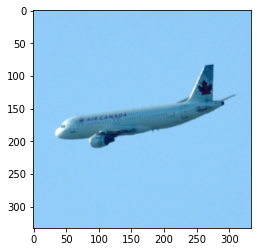

In [7]:
# 建立讀取影像的函數
def read_img(file):
    image_string = tf.io.read_file(file) # 讀取檔案
    # 將讀入的檔案以影像格式來解碼
    image_decode = tf.image.decode_image(image_string)
    return image_decode

img = read_img('Datasets/Ch7/image/airplane.png')
plt.imshow(img)

In [8]:
# 儲存一影像在記錄檔中，並顯示在TensorBoard上
with summary_writer.as_default(): #summary_writer作為預設寫入的紀錄檔
    tf.summary.image('Airplane', [img], step=0)

In [9]:
%load_ext tensorboard
%tensorboard --logdir models/Ch7/logs-summary/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 7980), started 0:04:09 ago. (Use '!kill 7980' to kill it.)

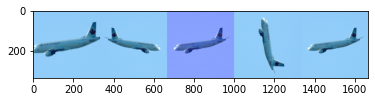

In [13]:
# 一次儲存5張影像在記錄檔中，並顯示在TensorBoard上
img_file = ['airplane_zoom.png', 'airplane_flip.png', 'airplane_color.png', 'airplane_rot.png', 'airplane.png']
imgs = []
for file in img_file:
    imgs.append(read_img('Datasets/Ch7/image/' + file))
image = np.hstack((imgs[0], imgs[1], imgs[2], imgs[3], imgs[4]))
plt.imshow(image)

In [14]:
with summary_writer.as_default(): #summary_writer作為預設寫入的紀錄檔
    tf.summary.image('Airplane Augmentation', imgs, max_outputs=5, step=0)

In [15]:
%load_ext tensorboard
%tensorboard --logdir models/Ch7/logs-summary/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 7980), started 0:04:34 ago. (Use '!kill 7980' to kill it.)

In [18]:
# 一次儲存5張影像在記錄檔中，但彼此不同時間，並顯示在TensorBoard上
with summary_writer.as_default(): #summary_writer作為預設寫入的紀錄檔
    for i, img in enumerate(imgs):
        tf.summary.image('Save image each step', [img], step=i)

In [19]:
%load_ext tensorboard
%tensorboard --logdir models/Ch7/logs-summary/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 7980), started 0:04:48 ago. (Use '!kill 7980' to kill it.)

## tf.summary.text
tf.summary.text為儲存文本資料的函數，可透過**TEXT**視覺化工具來顯示儲存的資料。

In [20]:
# 建立一個陣列，裡面包含對話紀錄
texts = ["Mr.A:Content-A",
         "Mr.B:Content-B",
         "Mr.A:Content-C",
         "Mr.B:Content-D",
         "Mr.A:Content-E"]
with summary_writer.as_default():
    for i, text in enumerate(texts):
        tf.summary.text("Chat record", text, step=i)

In [21]:
%load_ext tensorboard
%tensorboard --logdir models/Ch7/logs-summary/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 7980), started 0:04:59 ago. (Use '!kill 7980' to kill it.)

## tf.summary.audio
tf.summary.audio為儲存音訊的函數，可透過**AUDIO**視覺化工具來顯示儲存的音訊。

In [22]:
# 建立讀取音訊的函數
def read_audio(file):
    audio_string = tf.io.read_file(file)
    # 將讀入的檔案以音訊格式來解碼
    audio, fs = tf.audio.decode_wav(audio_string)
    # 因為 tf.summary.audio 要求輸入格式為[k(clips), t(frames), c(channels)]
    # 而解碼後的音訊只有[t(frames), c(channels)]，所以音訊需要增加一個維度
    audio = tf.expand_dims(audio, axis=0)
    return audio, fs

audio, fs = read_audio('Datasets/Ch7/audio/cat.wav')  # 讀取音訊檔

In [23]:
with summary_writer.as_default(): #summary_writer作為預設寫入的紀錄檔
    tf.summary.audio('Cat Audio', audio, fs, step=0)

In [24]:
%load_ext tensorboard
%tensorboard --logdir models/Ch7/logs-summary/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 7980), started 0:05:15 ago. (Use '!kill 7980' to kill it.)

## tf.summary.histogram
tf.summary.histogram為儲存數值分佈的函數，可透過**HISTOGRAM**和**DISTRIBUTIONS**視覺化工具來顯示儲存的數值分佈。  
tf.keras.callbacks.TensorBoard高階API可查看**網路權重分佈**的紀錄功能。  
如果想查看**網路層的輸出分佈**，就必須用tf.summary.histogram低階API。

In [25]:
# 建立一個常態分佈的數值在記錄檔中，並顯示在TensorBoard上。
data = tf.random.normal([64, 100], dtype=tf.float64) # 資料共64筆，每筆100個資料
with summary_writer.as_default(): #summary_writer作為預設寫入的紀錄檔
    tf.summary.histogram('Normal distribution', data, step=0)

In [26]:
%load_ext tensorboard
%tensorboard --logdir models/Ch7/logs-summary/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 7980), started 0:05:24 ago. (Use '!kill 7980' to kill it.)

In [27]:
# 儲存100組常態分佈的資料在記錄檔，且每一組平均差都相差0.1
with summary_writer.as_default(): #summary_writer作為預設寫入的紀錄檔
    for i, offest in enumerate(tf.range(0, 10, delta=0.1, dtype=tf.float64)):
        tf.summary.histogram('Normal distribution 2', data+offest, step=i)

In [28]:
%load_ext tensorboard
%tensorboard --logdir models/Ch7/logs-summary/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 7980), started 0:05:38 ago. (Use '!kill 7980' to kill it.)

# 實驗一：使用tf.summary.image紀錄訓練結果

In [15]:
import os, io
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from preprocessing import parse_aug_fn, parse_fn

In [4]:
# 建立 Confusion Matrix (混淆矩陣)
y_true = [2, 1, 0, 2, 2, 0, 1, 1]
y_pred = [0, 1, 0, 2, 2, 0, 2, 1]
cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=3).numpy() # num_classes(可選)，因為最大只到2，所以陣列為3 x 3
print("真實標籤: {}".format(y_true))
print("預測標籤: {}".format(y_pred))
cm

真實標籤: [2, 1, 0, 2, 2, 0, 1, 1]
預測標籤: [0, 1, 0, 2, 2, 0, 2, 1]


array([[2, 0, 0],
       [0, 2, 1],
       [1, 0, 2]])

Confusion Matrix的橫軸表示**y_true**，縱軸表示**y_pred**。  

<img src="img/cm_1.jpg" width="200" style="float:left">  

各軸: 0 ~ 2  
ex. 左上為: y_true = 0 && y_pred = 0 ==> 2  
右上: y_true = 0 && y_pred = 2 ==> 0

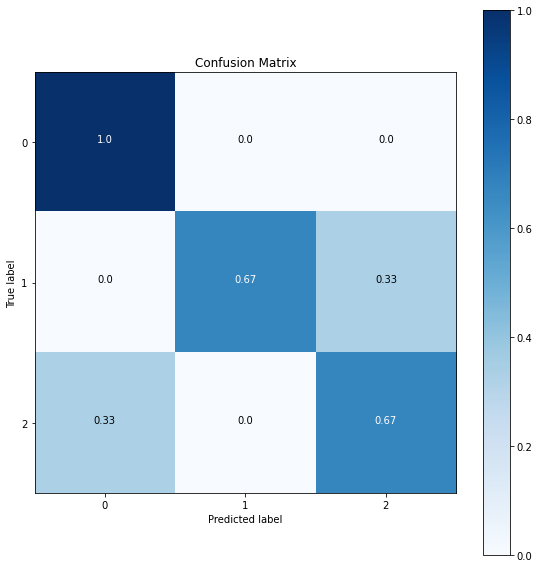

In [5]:
# 建立 plot_confusion_matrix函式並畫出
def plot_confusion_matrix(cm, class_names):
    """
    產生一張Matplotlib的Confusion Matrix
    參數:
        cm (shape = [n, n]): 傳入Confusion Matrix
        class_names (shape = [n]): 傳入類別名稱
    """
    # 標準化，np.around: decimals=2 代表取小數點到第2位
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    # 建立顯示畫面
    figure = plt.figure(figsize=(8, 8))
    # 根據 cm 的數值大小，在畫面填入顏色
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    # 設定標題
    plt.title("Confusion Matrix")
    # 刻度
    tick_index = np.arange(len(class_names))
    # 如果 Matplotlib為3.1.1版，須設定 ylim 在[-0.5 ~ 2.5]，否則y軸範圍會被縮小成[0 ~ 2]
    # plt.ylim([-0.5, 2.5])
    # y軸顯示類別名稱
    plt.yticks(tick_index, class_names)
    # x軸顯示類別名稱
    plt.xticks(tick_index, class_names)
    # 在圖片右邊產生一條顏色刻度條
    plt.colorbar()
    # 在每一格 Confusion Matrix 輸入預測百分比
    threshold = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            # 如果格內背景顏色太深，則使用白色文字，反之用黑色
            color = "white" if cm[i, j] > threshold else "black"
            plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    # 將圖片的位置進行調整，避免x或y軸的文字被遮擋
    plt.tight_layout()
    return figure
img = plot_confusion_matrix(cm, [0, 1, 2])

標準化的方式:  
```
# 標準化，np.around: decimals=2 代表取小數點到第2位
cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
```
<img src="img/cm_2.jpg" width="500" style="float:left">  

In [6]:
# 建立 plot_to_image函式
def plot_to_image(figue):
    """
    將 Matplotlib 圖片轉成 Tensorflow 形式的圖片
    """
    # 將 Matplotlib plot 的圖片以PNG的格式儲存到記憶體中
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    # 關閉 plt 圖片，防止圖片直接顯示
    plt.close(figue)
    buf.seek(0)
    # 將記憶體中的資料轉成 Tensorflow 形式的圖片
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    image = tf.expand_dims(image, 0)
    return image

In [35]:
# 測試
y_true = [2, 1, 0, 2, 2, 0, 1, 1]
y_pred = [0, 1, 0, 2, 2, 0, 2, 1]
cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=3).numpy()
img = plot_confusion_matrix(cm, [0, 1, 2])
img = plot_to_image(img)
summary_writer = tf.summary.create_file_writer('./models/Ch7/logs-summary')
with summary_writer.as_default(): #summary_writer作為預設寫入的紀錄檔
    tf.summary.image('Test img', img, step=0)

In [36]:
%load_ext tensorboard
%tensorboard --logdir models/Ch7/logs-summary/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 7980), started 0:06:04 ago. (Use '!kill 7980' to kill it.)

## 一. 客製化回調函數(Callback)
每一個 epoch 結束，會產生一張Confusion Matrix的圖片，並將圖片記錄在 TensorBoard上

In [7]:
class ConfusionMatrix(tf.keras.callbacks.Callback):
    def __init__(self, log_dir, test_data, class_name):
        super(ConfusionMatrix, self).__init__()
        self.log_dir = log_dir
        self.test_data = test_data
        self.class_names = class_name
        self.num_classes = len(class_name)
            
    def on_train_begin(self, logs=None):
        """
        fit、evaluate或predict任務開始時，執行這段。
        """
        path = os.path.join(self.log_dir, 'confusion_matrix')
        # 建立 TensorBoard 記錄檔
        self.writer = tf.summary.create_file_writer(path)
    
    def on_epoch_end(self, epoch, logs=None):
        """
        每一個epoch結束，執行這段。
        參數:
            epoch: 目前的epoch。
            logs: 傳入dict格式的紀錄資訊，例如: loss, val_loss等。
        """
        # 計算 Confusion Matrix
        total_cm = np.zeros([10, 10])
        for x, y_true in self.test_data:
            y_pred = self.model.predict(x)
            y_pred = np.argmax(y_pred, axis=1)
            y_true = np.argmax(y_true, axis=1)
            cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=self.num_classes).numpy()
            total_cm += cm
        # 產生一張 Matplotlib 的 Confusion Matrix
        figure = plot_confusion_matrix(total_cm, class_names=self.class_names)
        # 將 Matplotlib 圖片轉成 Tensorflow 形式的圖片
        cm_image = plot_to_image(figure)
        # 將圖片記錄在 TensorBoard log 中
        with self.writer.as_default():
            tf.summary.image("Confusion Matrix", cm_image, step=epoch)

## 二. 訓練模型

In [8]:
# 載入 CIFAR-10資料集
train_split, valid_split = ["train[:90%]", "train[90:]"] # 訓練:驗證 = 9:1
train_data, info = tfds.load("cifar10", split=train_split, with_info=True) # 讀取訓練資料及Data的資訊
valid_data = tfds.load("cifar10", split=valid_split) # 讀取驗證資料
test_data = tfds.load("cifar10", split="test")
class_name = info.features['label'].names
info

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE # 自行調整模式
batch_size = 128 # 批次大小
train_num = int(info.splits['train'].num_examples / 10) * 9 # 訓練資料數量

In [10]:
# 打散資料
train_data = train_data.shuffle(train_num)
# 載入預處理 parse_aug_fn()，CPU數量為自動調整模式
train_data = train_data.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小，並將 prefetch 模式打開(暫存空間為自動調整模式)
train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)
# 載入預處理 parse_fn()，CPU數量為自動調整模式
valid_data = valid_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
valid_data = valid_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)
# 載入預處理 parse_fn()，CPU數量為自動調整模式
test_data = test_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
test_data = test_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [11]:
# 建立模型
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, 3, activation='relu', kernel_initializer='glorot_uniform')(inputs)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(128, 3, activation='relu', kernel_initializer='glorot_uniform')(x)
x = layers.Conv2D(256, 3, activation='relu', kernel_initializer='glorot_uniform')(x)
x = layers.Conv2D(128, 3, activation='relu', kernel_initializer='glorot_uniform')(x)
x = layers.Conv2D(64, 3, activation='relu', kernel_initializer='glorot_uniform')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)
model_1 = keras.Model(inputs, outputs, name='model-1')
model_1.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         295040    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          7379

In [12]:
# 建立資料夾
model_dir = './models/Ch7/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
# 設定Optimizer、Loss Function、Metrics Function
model_1.compile(keras.optimizers.Adam(),
                loss=keras.losses.CategoricalCrossentropy(from_logits=True), 
                metrics=[keras.metrics.CategoricalAccuracy()])

# 儲存訓練記錄檔
log_dir = os.path.join('./models/Ch7', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

# 儲存 Confusion Matrix 圖片
custom_save = ConfusionMatrix(log_dir, test_data, class_name)

# 開始訓練
history_1 = model_1.fit(train_data,
                        epochs=100,
                        validation_data=valid_data,
                        callbacks=[model_cbk, custom_save])

Epoch 1/100
  1/352 [..............................] - ETA: 0s - loss: 2.3059 - categorical_accuracy: 0.1250WARNING:tensorflow:From C:\Users\a7032\AI_Deep_Learing\Tensorflow2\tf2\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


  2/352 [..............................] - ETA: 16s - loss: 2.3068 - categorical_accuracy: 0.1172WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0095s vs `on_train_batch_end` time: 0.0811s). Check your callbacks.


352/352 [==============================] - 14s 40ms/step - loss: 2.0739 - categorical_accuracy: 0.2202 - val_loss: 1.8163 - val_categorical_accuracy: 0.3454
Epoch 2/100
352/352 [==============================] - 13s 36ms/step - loss: 1.8466 - categorical_accuracy: 0.3211 - val_loss: 1.5170 - val_categorical_accuracy: 0.4477
Epoch 3/100
352/352 [==============================] - 13s 37ms/step - loss: 1.7266 - categorical_accuracy: 0.3690 - val_loss: 1.4064 - val_categorical_accuracy: 0.4928
Epoch 4/100
352/352 [==============================] - 13s 36ms/step - loss: 1.6311 - categorical_accuracy: 0.4084 - val_loss: 1.2811 - val_categorical_accuracy: 0.5342
Epoch 5/100
352/352 [==============================] - 13s 36ms/step - loss: 1.5587 - categorical_accuracy: 0.4364 - val_loss: 1.2652 - val_categorical_accuracy: 0.5481
Epoch 6/100
352/352 [==============================] - 13s 37ms/step - loss: 1.5007 - categorical_accuracy: 0.4655 - val_loss: 1.2069 - val_categorical_accuracy: 0.575

352/352 [==============================] - 13s 37ms/step - loss: 0.6713 - categorical_accuracy: 0.7789 - val_loss: 0.2800 - val_categorical_accuracy: 0.9083
Epoch 98/100
352/352 [==============================] - 13s 36ms/step - loss: 0.6630 - categorical_accuracy: 0.7819 - val_loss: 0.2848 - val_categorical_accuracy: 0.9065
Epoch 99/100
352/352 [==============================] - 13s 37ms/step - loss: 0.6630 - categorical_accuracy: 0.7818 - val_loss: 0.2846 - val_categorical_accuracy: 0.9071
Epoch 100/100
352/352 [==============================] - 13s 36ms/step - loss: 0.6703 - categorical_accuracy: 0.7782 - val_loss: 0.2805 - val_categorical_accuracy: 0.9081


In [13]:
%load_ext tensorboard
%tensorboard --logdir models/Ch7/model-1/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 19428), started 0:28:10 ago. (Use '!kill 19428' to kill it.)

In [18]:
loss_1, acc_1 = model_1.evaluate(test_data)
print(acc_1)

79/79 [==============================] - 1s 8ms/step - loss: 0.5494 - categorical_accuracy: 0.8252
0.8252000212669373


# 實驗二：使用TensorBoard超參數調校工具來訓練多個網路模型

In [1]:
import os, io
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from preprocessing import parse_aug_fn, parse_fn
# TensorBoard 超參數工具
from tensorboard.plugins.hparams import api as hp

## 定義要測試的超參數，總共 36 ( 2 x 2 x 3 x 3 )種組合
1. 影像增強(Image Augmentation, IA)  
2. Batch Normalization (BN)  
3. 學習率(Learning Rate, LR): 0.001、0.01、0.03  
4. 初始化(Initialization): Random Normal(RN)、Glorot Normal(GN)、He Normal(HN)

In [2]:
hparam_ia = hp.HParam('Image_Augmentation', hp.Discrete([False, True]))
hparam_bn = hp.HParam('Batch_Normalization', hp.Discrete([False, True]))
hparam_lr = hp.HParam('Learning_Rate', hp.Discrete([0.001, 0.01, 0.03]))
hparam_init = hp.HParam('Weight_Initialization', hp.Discrete(['RandomNormal_0.01std',
                                                              'GlorotNormal',
                                                              'HeNormal']))

## 將實驗摘要寫入記錄檔

In [17]:
# 建立 TensorBoard logs 檔
logs_dirs = os.path.join('./models/Ch7', 'model-2')
# 建立記錄檔
root_logdir_writer = tf.summary.create_file_writer(logs_dirs)
# 寫入記錄檔的方法
metric = 'Accuracy'
with root_logdir_writer.as_default(): # root_logdir_writer作為預設寫入的紀錄檔
    # 將實驗的超參數訊息和指標訊息寫到 TensorBoard 記錄檔中
    hp.hparams_config(hparams=[hparam_ia, hparam_bn, hparam_lr, hparam_init], 
                      metrics=[hp.Metric(metric, display_name="Accuracy")])

In [18]:
%load_ext tensorboard
%tensorboard --logdir models/Ch7/model-2/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 6772), started 1:11:48 ago. (Use '!kill 6772' to kill it.)

## 準備訓練資料

In [5]:
# 載入 CIFAR-10資料集
# 訓練:驗證 = 9:1
train_split, valid_split = ["train[:90%]", "train[90:]"]
# 沒有 IA 的訓練資料
train_data_no_aug, info = tfds.load("cifar10", split=train_split, with_info=True)
# 有 IA 的訓練資料
train_data_aug = tfds.load("cifar10", split=train_split)
# 驗證資料
valid_data = tfds.load("cifar10", split=valid_split)

In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE # 自行調整模式
batch_size = 128 # 批次大小
train_num = int(info.splits['train'].num_examples / 5) * 4  # 訓練資料數量

In [7]:
# 沒有 IA 的訓練資料
train_data_no_aug = train_data_no_aug.shuffle(train_num) # 打散資料
train_data_no_aug = train_data_no_aug.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE) # parse_fn()
train_data_no_aug = train_data_no_aug.batch(batch_size).prefetch(buffer_size=AUTOTUNE) # 批次大小
# 有 IA 的訓練資料
train_data_aug = train_data_aug.shuffle(train_num) # 打散資料
train_data_aug = train_data_aug.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE) # parse_aug_fn()
train_data_aug = train_data_aug.batch(batch_size).prefetch(buffer_size=AUTOTUNE) # 批次大小
# 驗證資料
valid_data = valid_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE) # parse_fn()
valid_data = valid_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE) # 批次大小

## 客製化回調函數(Callback)
用於紀錄每一次訓練模型使用的超參數和最終訓練結果的指標值(Accuracy)。

In [8]:
class HyperparameterCallback(tf.keras.callbacks.Callback):
    def __init__(self, log_dir, hparams):
        super(HyperparameterCallback, self).__init__()
        self.log_dir = log_dir
        self.hparams = hparams
        self.best_accuracy = 0
        self.writer = None
            
    def on_train_begin(self, logs=None):
        """
        fit、evaluate或predict任務開始時，執行這段。
        參數:
            logs: 傳入dict格式的紀錄資訊，例如: loss, val_loss等。
        """
        # 建立 TensorBoard 記錄檔
        self.writer = tf.summary.create_file_writer(self.log_dir)
    
    def on_epoch_end(self, epoch, logs=None):
        """
        每一個epoch結束，執行這段。
        參數:
            epoch: 目前的epoch。
            logs: 傳入dict格式的紀錄資訊，例如: loss, val_loss等。
        """
        # 每一個訓練 epoch 結束後，如模型有進步，則會更新準確率
        current_accuracy = logs.get('val_categorical_accuracy')
        if current_accuracy > self.best_accuracy:
            self.best_accuracy = current_accuracy
    def on_train_end(self, logs=None):
        """
        fit、evaluate或predict任務結束時，執行這段。
        參數:
            logs: 傳入dict格式的紀錄資訊，例如: loss, val_loss等。
        """
        with self.writer.as_default():
            hp.hparams(self.hparams) # 記錄這一次訓練的權重參數
            tf.summary.scalar(metric, self.best_accuracy, step=0)

## 建立訓練函數
此函數負責建立、編譯和訓練網路模型

In [23]:
def train_test_model(logs_dir, hparams):
    """
    參數：
        logs_dir: 目前執行的任務 log 檔位置
        hparams: 超參數
    """
    # 權重初始化: 使用 Random Normal(std=0.01) 、 Glorot Normal 、 He Normal
    init_choice = {'RandomNormal_0.01std': initializers.RandomNormal(0, 0.01),
                   'GlorotNormal': initializers.glorot_normal(),
                   'HeNormal': initializers.he_normal()}
    init = init_choice.get(hparams[hparam_init])
    
    # 模型
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(64, 3, kernel_initializer=init)(inputs)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(128, 3, kernel_initializer=init)(x)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(256, 3, kernel_initializer=init)(x)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(128, 3, kernel_initializer=init)(x)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(64, 3, kernel_initializer=init)(x)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, kernel_initializer=init)(x)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10)(x)
    model = keras.Model(inputs, outputs, name='model')
    
    model_dir = './models/Ch7/'
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    # 設定Optimizer、Loss Function、Metrics Function
    model.compile(keras.optimizers.Adam(hparams[hparam_lr]),
                  # 由於輸出層沒有手動加上Softmax，所以將 from_logits 設為True
                  loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=[keras.metrics.CategoricalAccuracy()])

    # 儲存訓練記錄檔
    model_cbk = keras.callbacks.TensorBoard(log_dir=logs_dir, write_graph=False)
    # 儲存網路模型權重
    model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/best-model.h5',
                                                 monitor='val_categorical_accuracy',
                                                 save_best_only=True,
                                                 mode='max')
    
    # 設定停止訓練條件(當Accuracy超過30次迭代沒有上升時，提前停止)
    model_els = keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy',
                                              min_delta=0,
                                              patience=30,
                                              mode='max')
    # 客製化超參數回調函數，紀錄訓練模型的超參數和指標
    model_hparam = HyperparameterCallback(logs_dir + '-hparam-tuning', hparams)
    
    # 開始訓練
    if hparams[hparam_ia]:
        history = model.fit(train_data_aug,
                            epochs=100,
                            validation_data=valid_data,
                            callbacks=[model_cbk, model_mckp, model_els, model_hparam])
    else:
        history = model.fit(train_data_no_aug,
                            epochs=100,
                            validation_data=valid_data,
                            callbacks=[model_cbk, model_mckp, model_els, model_hparam])

## 開始訓練36種模型

In [24]:
session_id = 1
for ia in hparam_ia.domain.values:
    for bn in hparam_bn.domain.values:
        for init in hparam_init.domain.values:
            for lr in hparam_lr.domain.values:
                print("現在訓練了第{}次".format(session_id))
                hparams = {hparam_ia:ia,
                           hparam_bn:bn,
                           hparam_lr:lr,
                           hparam_init:init}
                logs_dir = os.path.join("./models/Ch7/model-2", "run-{}".format(session_id))
                train_test_model(logs_dir, hparams)
                session_id += 1

現在訓練了第1次
Epoch 1/100
  2/352 [..............................] - ETA: 15s - loss: 2.3163 - categorical_accuracy: 0.1094WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0115s vs `on_train_batch_end` time: 0.0746s). Check your callbacks.


352/352 [==============================] - 11s 30ms/step - loss: 1.9250 - categorical_accuracy: 0.2758 - val_loss: 1.5706 - val_categorical_accuracy: 0.4198
Epoch 2/100
352/352 [==============================] - 10s 30ms/step - loss: 1.5391 - categorical_accuracy: 0.4419 - val_loss: 1.2556 - val_categorical_accuracy: 0.5434
Epoch 3/100
352/352 [==============================] - 11s 32ms/step - loss: 1.3874 - categorical_accuracy: 0.5052 - val_loss: 1.1275 - val_categorical_accuracy: 0.5946
Epoch 4/100
352/352 [==============================] - 10s 29ms/step - loss: 1.2720 - categorical_accuracy: 0.5513 - val_loss: 1.1468 - val_categorical_accuracy: 0.5916
Epoch 5/100
352/352 [==============================] - 10s 29ms/step - loss: 1.1730 - categorical_accuracy: 0.5862 - val_loss: 0.9929 - val_categorical_accuracy: 0.6372
Epoch 6/100
352/352 [==============================] - 11s 31ms/step - loss: 1.0959 - categorical_accuracy: 0.6158 - val_loss: 0.9242 - val_categorical_accuracy: 0.671

352/352 [==============================] - 10s 29ms/step - loss: 0.0590 - categorical_accuracy: 0.9820 - val_loss: 0.2579 - val_categorical_accuracy: 0.9633
Epoch 98/100
352/352 [==============================] - 10s 29ms/step - loss: 0.0639 - categorical_accuracy: 0.9802 - val_loss: 0.2644 - val_categorical_accuracy: 0.9640
Epoch 99/100
352/352 [==============================] - 10s 29ms/step - loss: 0.0680 - categorical_accuracy: 0.9787 - val_loss: 0.2292 - val_categorical_accuracy: 0.9712
Epoch 100/100
352/352 [==============================] - 10s 29ms/step - loss: 0.0699 - categorical_accuracy: 0.9789 - val_loss: 0.2907 - val_categorical_accuracy: 0.9583
現在訓練了第2次
Epoch 1/100
  2/352 [..............................] - ETA: 15s - loss: 114.5949 - categorical_accuracy: 0.0938WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0120s vs `on_train_batch_end` time: 0.0781s). Check your callbacks.


352/352 [==============================] - 10s 30ms/step - loss: 2.9526 - categorical_accuracy: 0.0981 - val_loss: 2.3032 - val_categorical_accuracy: 0.0999
Epoch 2/100
352/352 [==============================] - 11s 30ms/step - loss: 2.3033 - categorical_accuracy: 0.0999 - val_loss: 2.3031 - val_categorical_accuracy: 0.1000
Epoch 3/100
352/352 [==============================] - 11s 30ms/step - loss: 2.3032 - categorical_accuracy: 0.0995 - val_loss: 2.3029 - val_categorical_accuracy: 0.1001
Epoch 4/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3033 - categorical_accuracy: 0.1000 - val_loss: 2.3029 - val_categorical_accuracy: 0.1001
Epoch 5/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3033 - categorical_accuracy: 0.0978 - val_loss: 2.3031 - val_categorical_accuracy: 0.1000
Epoch 6/100
352/352 [==============================] - 11s 30ms/step - loss: 2.3031 - categorical_accuracy: 0.1018 - val_loss: 2.3031 - val_categorical_accuracy: 0.100

352/352 [==============================] - 10s 29ms/step - loss: 81.1530 - categorical_accuracy: 0.0987 - val_loss: 2.3040 - val_categorical_accuracy: 0.0999
Epoch 2/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3041 - categorical_accuracy: 0.1006 - val_loss: 2.3037 - val_categorical_accuracy: 0.1000
Epoch 3/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3047 - categorical_accuracy: 0.1010 - val_loss: 2.3045 - val_categorical_accuracy: 0.1001
Epoch 4/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3043 - categorical_accuracy: 0.1016 - val_loss: 2.3043 - val_categorical_accuracy: 0.1001
Epoch 5/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3045 - categorical_accuracy: 0.0982 - val_loss: 2.3041 - val_categorical_accuracy: 0.1000
Epoch 6/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3049 - categorical_accuracy: 0.0963 - val_loss: 2.3042 - val_categorical_accuracy: 0.09

352/352 [==============================] - 10s 29ms/step - loss: 2.3077 - categorical_accuracy: 0.0985 - val_loss: 2.3026 - val_categorical_accuracy: 0.0999
Epoch 2/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3027 - categorical_accuracy: 0.0984 - val_loss: 2.3026 - val_categorical_accuracy: 0.0999
Epoch 3/100
352/352 [==============================] - 11s 30ms/step - loss: 2.3027 - categorical_accuracy: 0.0963 - val_loss: 2.3026 - val_categorical_accuracy: 0.1000
Epoch 4/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3027 - categorical_accuracy: 0.0982 - val_loss: 2.3026 - val_categorical_accuracy: 0.1000
Epoch 5/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3027 - categorical_accuracy: 0.0986 - val_loss: 2.3026 - val_categorical_accuracy: 0.1000
Epoch 6/100
352/352 [==============================] - 11s 30ms/step - loss: 2.3027 - categorical_accuracy: 0.0972 - val_loss: 2.3026 - val_categorical_accuracy: 0.100

352/352 [==============================] - 11s 32ms/step - loss: 3.9325 - categorical_accuracy: 0.1616 - val_loss: 1.9373 - val_categorical_accuracy: 0.2152
Epoch 2/100
352/352 [==============================] - 10s 29ms/step - loss: 1.9705 - categorical_accuracy: 0.2177 - val_loss: 1.9004 - val_categorical_accuracy: 0.2481
Epoch 3/100
352/352 [==============================] - 10s 29ms/step - loss: 1.9239 - categorical_accuracy: 0.2336 - val_loss: 1.8024 - val_categorical_accuracy: 0.2830
Epoch 4/100
352/352 [==============================] - 11s 30ms/step - loss: 1.8902 - categorical_accuracy: 0.2528 - val_loss: 1.8348 - val_categorical_accuracy: 0.2779
Epoch 5/100
352/352 [==============================] - 10s 29ms/step - loss: 1.8673 - categorical_accuracy: 0.2654 - val_loss: 1.7655 - val_categorical_accuracy: 0.3049
Epoch 6/100
352/352 [==============================] - 10s 29ms/step - loss: 1.8451 - categorical_accuracy: 0.2788 - val_loss: 1.7251 - val_categorical_accuracy: 0.326

352/352 [==============================] - 10s 29ms/step - loss: 361.3662 - categorical_accuracy: 0.1005 - val_loss: 2.3050 - val_categorical_accuracy: 0.1001
Epoch 2/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3046 - categorical_accuracy: 0.0983 - val_loss: 2.3041 - val_categorical_accuracy: 0.1001
Epoch 3/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3046 - categorical_accuracy: 0.0991 - val_loss: 2.3030 - val_categorical_accuracy: 0.1000
Epoch 4/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3043 - categorical_accuracy: 0.0984 - val_loss: 2.3039 - val_categorical_accuracy: 0.1001
Epoch 5/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3047 - categorical_accuracy: 0.1008 - val_loss: 2.3039 - val_categorical_accuracy: 0.0999
Epoch 6/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3044 - categorical_accuracy: 0.0996 - val_loss: 2.3046 - val_categorical_accuracy: 0.0

352/352 [==============================] - 10s 29ms/step - loss: 2.3027 - categorical_accuracy: 0.0975 - val_loss: 2.3026 - val_categorical_accuracy: 0.1000
Epoch 2/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3027 - categorical_accuracy: 0.0992 - val_loss: 2.3026 - val_categorical_accuracy: 0.0999
Epoch 3/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3027 - categorical_accuracy: 0.0974 - val_loss: 2.3026 - val_categorical_accuracy: 0.0999
Epoch 4/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3027 - categorical_accuracy: 0.0968 - val_loss: 2.3026 - val_categorical_accuracy: 0.0999
Epoch 5/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3027 - categorical_accuracy: 0.0967 - val_loss: 2.3026 - val_categorical_accuracy: 0.0999
Epoch 6/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3027 - categorical_accuracy: 0.0986 - val_loss: 2.3026 - val_categorical_accuracy: 0.100

352/352 [==============================] - 11s 30ms/step - loss: 2.3040 - categorical_accuracy: 0.0968 - val_loss: 2.3027 - val_categorical_accuracy: 0.0999
Epoch 2/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3032 - categorical_accuracy: 0.1009 - val_loss: 2.3033 - val_categorical_accuracy: 0.0999
Epoch 3/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3033 - categorical_accuracy: 0.0989 - val_loss: 2.3031 - val_categorical_accuracy: 0.1000
Epoch 4/100
352/352 [==============================] - 11s 30ms/step - loss: 2.3035 - categorical_accuracy: 0.0964 - val_loss: 2.3032 - val_categorical_accuracy: 0.1001
Epoch 5/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3033 - categorical_accuracy: 0.0991 - val_loss: 2.3031 - val_categorical_accuracy: 0.0999
Epoch 6/100
352/352 [==============================] - 10s 30ms/step - loss: 2.3032 - categorical_accuracy: 0.1005 - val_loss: 2.3031 - val_categorical_accuracy: 0.100

352/352 [==============================] - 11s 30ms/step - loss: 3.5628 - categorical_accuracy: 0.1036 - val_loss: 2.3047 - val_categorical_accuracy: 0.0999
Epoch 2/100
352/352 [==============================] - 11s 31ms/step - loss: 2.3045 - categorical_accuracy: 0.1004 - val_loss: 2.3042 - val_categorical_accuracy: 0.1000
Epoch 3/100
352/352 [==============================] - 10s 29ms/step - loss: 2.3048 - categorical_accuracy: 0.0984 - val_loss: 2.3036 - val_categorical_accuracy: 0.0999
Epoch 4/100
352/352 [==============================] - 10s 30ms/step - loss: 2.3048 - categorical_accuracy: 0.0992 - val_loss: 2.3058 - val_categorical_accuracy: 0.0999
Epoch 5/100
352/352 [==============================] - 11s 30ms/step - loss: 2.3047 - categorical_accuracy: 0.0976 - val_loss: 2.3041 - val_categorical_accuracy: 0.1000
Epoch 6/100
352/352 [==============================] - 11s 30ms/step - loss: 2.3046 - categorical_accuracy: 0.0997 - val_loss: 2.3048 - val_categorical_accuracy: 0.100

352/352 [==============================] - 13s 38ms/step - loss: 1.5674 - categorical_accuracy: 0.4462 - val_loss: 2.5918 - val_categorical_accuracy: 0.1660
Epoch 2/100
352/352 [==============================] - 13s 37ms/step - loss: 1.1144 - categorical_accuracy: 0.6167 - val_loss: 1.2353 - val_categorical_accuracy: 0.5493
Epoch 3/100
352/352 [==============================] - 13s 37ms/step - loss: 0.9247 - categorical_accuracy: 0.6844 - val_loss: 0.9734 - val_categorical_accuracy: 0.6547
Epoch 4/100
352/352 [==============================] - 13s 36ms/step - loss: 0.8038 - categorical_accuracy: 0.7278 - val_loss: 0.8510 - val_categorical_accuracy: 0.6980
Epoch 5/100
352/352 [==============================] - 13s 37ms/step - loss: 0.7123 - categorical_accuracy: 0.7599 - val_loss: 1.1523 - val_categorical_accuracy: 0.6207
Epoch 6/100
352/352 [==============================] - 13s 36ms/step - loss: 0.6413 - categorical_accuracy: 0.7879 - val_loss: 0.7489 - val_categorical_accuracy: 0.731

352/352 [==============================] - 12s 35ms/step - loss: 0.0251 - categorical_accuracy: 0.9923 - val_loss: 0.1904 - val_categorical_accuracy: 0.9660
Epoch 98/100
352/352 [==============================] - 12s 34ms/step - loss: 0.0231 - categorical_accuracy: 0.9924 - val_loss: 0.1694 - val_categorical_accuracy: 0.9681
Epoch 99/100
352/352 [==============================] - 13s 38ms/step - loss: 0.0227 - categorical_accuracy: 0.9928 - val_loss: 0.1646 - val_categorical_accuracy: 0.9702
Epoch 100/100
352/352 [==============================] - 13s 38ms/step - loss: 0.0203 - categorical_accuracy: 0.9938 - val_loss: 0.2279 - val_categorical_accuracy: 0.9536
現在訓練了第11次
Epoch 1/100
  2/352 [..............................] - ETA: 22s - loss: 2.8474 - categorical_accuracy: 0.1680WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0135s vs `on_train_batch_end` time: 0.1141s). Check your callbacks.


352/352 [==============================] - 13s 38ms/step - loss: 1.6122 - categorical_accuracy: 0.4099 - val_loss: 1.8431 - val_categorical_accuracy: 0.3833
Epoch 2/100
352/352 [==============================] - 13s 38ms/step - loss: 1.2566 - categorical_accuracy: 0.5543 - val_loss: 1.6108 - val_categorical_accuracy: 0.4484
Epoch 3/100
352/352 [==============================] - 13s 37ms/step - loss: 1.0676 - categorical_accuracy: 0.6268 - val_loss: 1.1506 - val_categorical_accuracy: 0.5891
Epoch 4/100
352/352 [==============================] - 13s 37ms/step - loss: 0.9375 - categorical_accuracy: 0.6728 - val_loss: 1.3123 - val_categorical_accuracy: 0.5267
Epoch 5/100
352/352 [==============================] - 13s 37ms/step - loss: 0.8499 - categorical_accuracy: 0.7059 - val_loss: 0.9707 - val_categorical_accuracy: 0.6624
Epoch 6/100
352/352 [==============================] - 13s 38ms/step - loss: 0.7605 - categorical_accuracy: 0.7401 - val_loss: 1.5332 - val_categorical_accuracy: 0.572

352/352 [==============================] - 13s 37ms/step - loss: 0.0291 - categorical_accuracy: 0.9905 - val_loss: 0.2114 - val_categorical_accuracy: 0.9620
Epoch 98/100
352/352 [==============================] - 12s 35ms/step - loss: 0.0295 - categorical_accuracy: 0.9907 - val_loss: 0.1553 - val_categorical_accuracy: 0.9745
Epoch 99/100
352/352 [==============================] - 13s 36ms/step - loss: 0.0367 - categorical_accuracy: 0.9882 - val_loss: 0.1930 - val_categorical_accuracy: 0.9663
Epoch 100/100
352/352 [==============================] - 13s 37ms/step - loss: 0.0322 - categorical_accuracy: 0.9896 - val_loss: 0.2073 - val_categorical_accuracy: 0.9652
現在訓練了第12次
Epoch 1/100
  2/352 [..............................] - ETA: 24s - loss: 3.0664 - categorical_accuracy: 0.0859WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0130s vs `on_train_batch_end` time: 0.1286s). Check your callbacks.


352/352 [==============================] - 13s 37ms/step - loss: 1.7050 - categorical_accuracy: 0.3648 - val_loss: 1.5032 - val_categorical_accuracy: 0.4617
Epoch 2/100
352/352 [==============================] - 13s 37ms/step - loss: 1.3856 - categorical_accuracy: 0.5028 - val_loss: 1.6764 - val_categorical_accuracy: 0.4710
Epoch 3/100
352/352 [==============================] - 13s 36ms/step - loss: 1.1993 - categorical_accuracy: 0.5754 - val_loss: 1.1429 - val_categorical_accuracy: 0.5955
Epoch 4/100
352/352 [==============================] - 13s 38ms/step - loss: 1.0643 - categorical_accuracy: 0.6292 - val_loss: 1.2430 - val_categorical_accuracy: 0.5804
Epoch 5/100
352/352 [==============================] - 14s 39ms/step - loss: 0.9730 - categorical_accuracy: 0.6623 - val_loss: 0.8747 - val_categorical_accuracy: 0.6919
Epoch 6/100
352/352 [==============================] - 13s 38ms/step - loss: 0.8859 - categorical_accuracy: 0.6914 - val_loss: 0.9098 - val_categorical_accuracy: 0.679

352/352 [==============================] - 12s 34ms/step - loss: 0.0524 - categorical_accuracy: 0.9842 - val_loss: 0.2357 - val_categorical_accuracy: 0.9641
Epoch 98/100
352/352 [==============================] - 12s 34ms/step - loss: 0.0526 - categorical_accuracy: 0.9847 - val_loss: 0.2174 - val_categorical_accuracy: 0.9667
Epoch 99/100
352/352 [==============================] - 12s 35ms/step - loss: 0.0583 - categorical_accuracy: 0.9829 - val_loss: 0.2604 - val_categorical_accuracy: 0.9621
Epoch 100/100
352/352 [==============================] - 13s 37ms/step - loss: 0.0492 - categorical_accuracy: 0.9850 - val_loss: 0.1701 - val_categorical_accuracy: 0.9759
現在訓練了第13次
Epoch 1/100
  2/352 [..............................] - ETA: 25s - loss: 3.0896 - categorical_accuracy: 0.0938WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0155s vs `on_train_batch_end` time: 0.1306s). Check your callbacks.


352/352 [==============================] - 12s 35ms/step - loss: 1.5809 - categorical_accuracy: 0.4440 - val_loss: 1.3776 - val_categorical_accuracy: 0.5071
Epoch 2/100
352/352 [==============================] - 12s 34ms/step - loss: 1.0747 - categorical_accuracy: 0.6310 - val_loss: 1.0825 - val_categorical_accuracy: 0.6213
Epoch 3/100
352/352 [==============================] - 12s 34ms/step - loss: 0.8894 - categorical_accuracy: 0.6979 - val_loss: 0.7328 - val_categorical_accuracy: 0.7421
Epoch 4/100
352/352 [==============================] - 12s 34ms/step - loss: 0.7725 - categorical_accuracy: 0.7385 - val_loss: 0.9579 - val_categorical_accuracy: 0.6704
Epoch 5/100
352/352 [==============================] - 12s 34ms/step - loss: 0.6872 - categorical_accuracy: 0.7703 - val_loss: 0.7656 - val_categorical_accuracy: 0.7405
Epoch 6/100
352/352 [==============================] - 13s 37ms/step - loss: 0.6104 - categorical_accuracy: 0.7975 - val_loss: 0.7194 - val_categorical_accuracy: 0.745

352/352 [==============================] - 12s 34ms/step - loss: 0.0222 - categorical_accuracy: 0.9926 - val_loss: 0.1422 - val_categorical_accuracy: 0.9768
Epoch 98/100
352/352 [==============================] - 12s 34ms/step - loss: 0.0212 - categorical_accuracy: 0.9934 - val_loss: 0.1915 - val_categorical_accuracy: 0.9690
Epoch 99/100
352/352 [==============================] - 12s 34ms/step - loss: 0.0250 - categorical_accuracy: 0.9917 - val_loss: 0.2086 - val_categorical_accuracy: 0.9613
Epoch 100/100
352/352 [==============================] - 38s 108ms/step - loss: 0.0207 - categorical_accuracy: 0.9931 - val_loss: 0.1272 - val_categorical_accuracy: 0.9792
現在訓練了第14次
Epoch 1/100
  2/352 [..............................] - ETA: 24s - loss: 2.9138 - categorical_accuracy: 0.1250WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0145s vs `on_train_batch_end` time: 0.1236s). Check your callbacks.


352/352 [==============================] - 12s 35ms/step - loss: 1.5919 - categorical_accuracy: 0.4140 - val_loss: 1.6426 - val_categorical_accuracy: 0.4196
Epoch 2/100
352/352 [==============================] - 12s 34ms/step - loss: 1.1942 - categorical_accuracy: 0.5760 - val_loss: 2.0460 - val_categorical_accuracy: 0.4088
Epoch 3/100
352/352 [==============================] - 12s 34ms/step - loss: 1.0162 - categorical_accuracy: 0.6456 - val_loss: 1.0919 - val_categorical_accuracy: 0.6136
Epoch 4/100
352/352 [==============================] - 12s 34ms/step - loss: 0.8899 - categorical_accuracy: 0.6942 - val_loss: 0.9580 - val_categorical_accuracy: 0.6697
Epoch 5/100
352/352 [==============================] - 13s 36ms/step - loss: 0.7879 - categorical_accuracy: 0.7306 - val_loss: 0.8651 - val_categorical_accuracy: 0.6964
Epoch 6/100
352/352 [==============================] - 12s 34ms/step - loss: 0.7028 - categorical_accuracy: 0.7618 - val_loss: 0.6317 - val_categorical_accuracy: 0.779

352/352 [==============================] - 12s 35ms/step - loss: 0.0303 - categorical_accuracy: 0.9907 - val_loss: 0.2031 - val_categorical_accuracy: 0.9638
Epoch 98/100
352/352 [==============================] - 12s 35ms/step - loss: 0.0298 - categorical_accuracy: 0.9903 - val_loss: 0.1899 - val_categorical_accuracy: 0.9651
Epoch 99/100
352/352 [==============================] - 12s 35ms/step - loss: 0.0328 - categorical_accuracy: 0.9902 - val_loss: 0.1674 - val_categorical_accuracy: 0.9685
Epoch 100/100
352/352 [==============================] - 12s 35ms/step - loss: 0.0229 - categorical_accuracy: 0.9928 - val_loss: 0.1857 - val_categorical_accuracy: 0.9665
現在訓練了第15次
Epoch 1/100
  2/352 [..............................] - ETA: 21s - loss: 2.8554 - categorical_accuracy: 0.1211WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0135s vs `on_train_batch_end` time: 0.1106s). Check your callbacks.


352/352 [==============================] - 13s 37ms/step - loss: 1.6706 - categorical_accuracy: 0.3856 - val_loss: 3.1166 - val_categorical_accuracy: 0.3087
Epoch 2/100
352/352 [==============================] - 12s 36ms/step - loss: 1.3074 - categorical_accuracy: 0.5338 - val_loss: 1.4791 - val_categorical_accuracy: 0.4935
Epoch 3/100
352/352 [==============================] - 12s 35ms/step - loss: 1.1417 - categorical_accuracy: 0.5990 - val_loss: 1.1728 - val_categorical_accuracy: 0.5866
Epoch 4/100
352/352 [==============================] - 12s 35ms/step - loss: 1.0229 - categorical_accuracy: 0.6465 - val_loss: 1.4519 - val_categorical_accuracy: 0.5588
Epoch 5/100
352/352 [==============================] - 12s 35ms/step - loss: 0.9193 - categorical_accuracy: 0.6826 - val_loss: 1.2608 - val_categorical_accuracy: 0.5774
Epoch 6/100
352/352 [==============================] - 12s 35ms/step - loss: 0.8353 - categorical_accuracy: 0.7153 - val_loss: 1.1470 - val_categorical_accuracy: 0.625

352/352 [==============================] - 12s 35ms/step - loss: 0.0465 - categorical_accuracy: 0.9862 - val_loss: 0.3228 - val_categorical_accuracy: 0.9485
Epoch 98/100
352/352 [==============================] - 13s 36ms/step - loss: 0.0496 - categorical_accuracy: 0.9857 - val_loss: 0.2550 - val_categorical_accuracy: 0.9565
Epoch 99/100
352/352 [==============================] - 12s 35ms/step - loss: 0.0500 - categorical_accuracy: 0.9852 - val_loss: 0.2131 - val_categorical_accuracy: 0.9646
Epoch 100/100
352/352 [==============================] - 13s 36ms/step - loss: 0.0403 - categorical_accuracy: 0.9882 - val_loss: 0.3418 - val_categorical_accuracy: 0.9547
現在訓練了第16次
Epoch 1/100
  2/352 [..............................] - ETA: 22s - loss: 3.0899 - categorical_accuracy: 0.0898WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0135s vs `on_train_batch_end` time: 0.1146s). Check your callbacks.


352/352 [==============================] - 13s 36ms/step - loss: 1.6695 - categorical_accuracy: 0.4078 - val_loss: 3.2781 - val_categorical_accuracy: 0.1258
Epoch 2/100
352/352 [==============================] - 13s 36ms/step - loss: 1.1890 - categorical_accuracy: 0.5870 - val_loss: 1.4619 - val_categorical_accuracy: 0.5393
Epoch 3/100
352/352 [==============================] - 13s 36ms/step - loss: 0.9886 - categorical_accuracy: 0.6591 - val_loss: 1.3762 - val_categorical_accuracy: 0.5510
Epoch 4/100
352/352 [==============================] - 13s 36ms/step - loss: 0.8623 - categorical_accuracy: 0.7087 - val_loss: 1.6019 - val_categorical_accuracy: 0.4850
Epoch 5/100
352/352 [==============================] - 13s 36ms/step - loss: 0.7656 - categorical_accuracy: 0.7433 - val_loss: 1.1365 - val_categorical_accuracy: 0.6204
Epoch 6/100
352/352 [==============================] - 12s 35ms/step - loss: 0.6936 - categorical_accuracy: 0.7688 - val_loss: 0.9921 - val_categorical_accuracy: 0.665

352/352 [==============================] - 12s 35ms/step - loss: 0.0258 - categorical_accuracy: 0.9919 - val_loss: 0.3168 - val_categorical_accuracy: 0.9414
Epoch 98/100
352/352 [==============================] - 13s 36ms/step - loss: 0.0203 - categorical_accuracy: 0.9935 - val_loss: 0.2439 - val_categorical_accuracy: 0.9500
Epoch 99/100
352/352 [==============================] - 12s 35ms/step - loss: 0.0191 - categorical_accuracy: 0.9941 - val_loss: 0.1351 - val_categorical_accuracy: 0.9763
Epoch 100/100
352/352 [==============================] - 12s 35ms/step - loss: 0.0198 - categorical_accuracy: 0.9937 - val_loss: 0.1305 - val_categorical_accuracy: 0.9800
現在訓練了第17次
Epoch 1/100
  2/352 [..............................] - ETA: 23s - loss: 2.9156 - categorical_accuracy: 0.0938WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0135s vs `on_train_batch_end` time: 0.1196s). Check your callbacks.


352/352 [==============================] - 13s 37ms/step - loss: 1.6674 - categorical_accuracy: 0.3923 - val_loss: 3.0584 - val_categorical_accuracy: 0.2098
Epoch 2/100
352/352 [==============================] - 12s 35ms/step - loss: 1.2782 - categorical_accuracy: 0.5461 - val_loss: 1.3729 - val_categorical_accuracy: 0.5223
Epoch 3/100
352/352 [==============================] - 12s 35ms/step - loss: 1.1033 - categorical_accuracy: 0.6115 - val_loss: 1.8316 - val_categorical_accuracy: 0.4671
Epoch 4/100
352/352 [==============================] - 12s 35ms/step - loss: 0.9807 - categorical_accuracy: 0.6589 - val_loss: 1.3515 - val_categorical_accuracy: 0.5390
Epoch 5/100
352/352 [==============================] - 12s 35ms/step - loss: 0.8746 - categorical_accuracy: 0.6981 - val_loss: 0.8161 - val_categorical_accuracy: 0.7128
Epoch 6/100
352/352 [==============================] - 12s 35ms/step - loss: 0.7862 - categorical_accuracy: 0.7318 - val_loss: 0.9133 - val_categorical_accuracy: 0.677

352/352 [==============================] - 13s 36ms/step - loss: 1.7174 - categorical_accuracy: 0.3612 - val_loss: 1.7774 - val_categorical_accuracy: 0.4125
Epoch 2/100
352/352 [==============================] - 13s 36ms/step - loss: 1.3776 - categorical_accuracy: 0.5055 - val_loss: 1.7385 - val_categorical_accuracy: 0.4338
Epoch 3/100
352/352 [==============================] - 13s 36ms/step - loss: 1.2037 - categorical_accuracy: 0.5755 - val_loss: 1.8718 - val_categorical_accuracy: 0.4608
Epoch 4/100
352/352 [==============================] - 13s 36ms/step - loss: 1.0549 - categorical_accuracy: 0.6350 - val_loss: 1.6828 - val_categorical_accuracy: 0.5249
Epoch 5/100
352/352 [==============================] - 13s 36ms/step - loss: 0.9683 - categorical_accuracy: 0.6697 - val_loss: 1.3363 - val_categorical_accuracy: 0.5884
Epoch 6/100
352/352 [==============================] - 13s 36ms/step - loss: 0.8868 - categorical_accuracy: 0.6946 - val_loss: 0.9875 - val_categorical_accuracy: 0.662

352/352 [==============================] - 13s 36ms/step - loss: 0.0523 - categorical_accuracy: 0.9854 - val_loss: 0.1618 - val_categorical_accuracy: 0.9735
Epoch 98/100
352/352 [==============================] - 12s 35ms/step - loss: 0.0540 - categorical_accuracy: 0.9841 - val_loss: 0.2250 - val_categorical_accuracy: 0.9646
Epoch 99/100
352/352 [==============================] - 12s 35ms/step - loss: 0.0532 - categorical_accuracy: 0.9848 - val_loss: 0.1986 - val_categorical_accuracy: 0.9678
Epoch 100/100
352/352 [==============================] - 12s 35ms/step - loss: 0.0478 - categorical_accuracy: 0.9854 - val_loss: 0.7186 - val_categorical_accuracy: 0.8995
現在訓練了第19次
Epoch 1/100
  2/352 [..............................] - ETA: 28s - loss: 2.2979 - categorical_accuracy: 0.1133WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0100s vs `on_train_batch_end` time: 0.1531s). Check your callbacks.


352/352 [==============================] - 10s 29ms/step - loss: 2.0724 - categorical_accuracy: 0.2204 - val_loss: 1.8309 - val_categorical_accuracy: 0.3410
Epoch 2/100
352/352 [==============================] - 10s 28ms/step - loss: 1.8508 - categorical_accuracy: 0.3230 - val_loss: 1.5188 - val_categorical_accuracy: 0.4546
Epoch 3/100
352/352 [==============================] - 10s 28ms/step - loss: 1.7171 - categorical_accuracy: 0.3768 - val_loss: 1.3779 - val_categorical_accuracy: 0.5010
Epoch 4/100
352/352 [==============================] - 10s 28ms/step - loss: 1.6273 - categorical_accuracy: 0.4110 - val_loss: 1.3078 - val_categorical_accuracy: 0.5336
Epoch 5/100
352/352 [==============================] - 10s 28ms/step - loss: 1.5398 - categorical_accuracy: 0.4446 - val_loss: 1.1707 - val_categorical_accuracy: 0.5827
Epoch 6/100
352/352 [==============================] - 10s 28ms/step - loss: 1.4855 - categorical_accuracy: 0.4703 - val_loss: 1.1605 - val_categorical_accuracy: 0.597

352/352 [==============================] - 10s 28ms/step - loss: 0.6689 - categorical_accuracy: 0.7819 - val_loss: 0.3144 - val_categorical_accuracy: 0.8924
Epoch 98/100
352/352 [==============================] - 10s 28ms/step - loss: 0.6689 - categorical_accuracy: 0.7801 - val_loss: 0.2707 - val_categorical_accuracy: 0.9098
Epoch 99/100
352/352 [==============================] - 10s 28ms/step - loss: 0.6668 - categorical_accuracy: 0.7790 - val_loss: 0.2922 - val_categorical_accuracy: 0.9052
Epoch 100/100
352/352 [==============================] - 10s 28ms/step - loss: 0.6665 - categorical_accuracy: 0.7788 - val_loss: 0.2742 - val_categorical_accuracy: 0.9080
現在訓練了第20次
Epoch 1/100
  2/352 [..............................] - ETA: 15s - loss: 55.5450 - categorical_accuracy: 0.1094WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0095s vs `on_train_batch_end` time: 0.0761s). Check your callbacks.


352/352 [==============================] - 10s 29ms/step - loss: 2.6099 - categorical_accuracy: 0.0996 - val_loss: 2.3030 - val_categorical_accuracy: 0.1000
Epoch 2/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3033 - categorical_accuracy: 0.0971 - val_loss: 2.3037 - val_categorical_accuracy: 0.1000
Epoch 3/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3034 - categorical_accuracy: 0.0989 - val_loss: 2.3030 - val_categorical_accuracy: 0.1001
Epoch 4/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3035 - categorical_accuracy: 0.0976 - val_loss: 2.3033 - val_categorical_accuracy: 0.1000
Epoch 5/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3033 - categorical_accuracy: 0.0997 - val_loss: 2.3028 - val_categorical_accuracy: 0.1001
Epoch 6/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3034 - categorical_accuracy: 0.1009 - val_loss: 2.3032 - val_categorical_accuracy: 0.100

352/352 [==============================] - 10s 29ms/step - loss: 192.9381 - categorical_accuracy: 0.1009 - val_loss: 2.3039 - val_categorical_accuracy: 0.1001
Epoch 2/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3041 - categorical_accuracy: 0.1000 - val_loss: 2.3033 - val_categorical_accuracy: 0.0999
Epoch 3/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3046 - categorical_accuracy: 0.0991 - val_loss: 2.3043 - val_categorical_accuracy: 0.1000
Epoch 4/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3044 - categorical_accuracy: 0.0989 - val_loss: 2.3030 - val_categorical_accuracy: 0.1000
Epoch 5/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3044 - categorical_accuracy: 0.0994 - val_loss: 2.3041 - val_categorical_accuracy: 0.0999
Epoch 6/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3045 - categorical_accuracy: 0.0995 - val_loss: 2.3049 - val_categorical_accuracy: 0.1

352/352 [==============================] - 10s 29ms/step - loss: 2.1864 - categorical_accuracy: 0.1579 - val_loss: 1.9181 - val_categorical_accuracy: 0.2987
Epoch 2/100
352/352 [==============================] - 10s 28ms/step - loss: 2.0009 - categorical_accuracy: 0.2417 - val_loss: 1.7216 - val_categorical_accuracy: 0.3693
Epoch 3/100
352/352 [==============================] - 10s 28ms/step - loss: 1.8791 - categorical_accuracy: 0.2971 - val_loss: 1.5589 - val_categorical_accuracy: 0.4458
Epoch 4/100
352/352 [==============================] - 10s 28ms/step - loss: 1.7546 - categorical_accuracy: 0.3507 - val_loss: 1.4136 - val_categorical_accuracy: 0.4671
Epoch 5/100
352/352 [==============================] - 10s 28ms/step - loss: 1.6588 - categorical_accuracy: 0.3899 - val_loss: 1.3298 - val_categorical_accuracy: 0.5021
Epoch 6/100
352/352 [==============================] - 10s 28ms/step - loss: 1.5674 - categorical_accuracy: 0.4306 - val_loss: 1.1818 - val_categorical_accuracy: 0.578

352/352 [==============================] - 10s 28ms/step - loss: 0.6307 - categorical_accuracy: 0.7923 - val_loss: 0.2359 - val_categorical_accuracy: 0.9253
Epoch 98/100
352/352 [==============================] - 10s 28ms/step - loss: 0.6317 - categorical_accuracy: 0.7951 - val_loss: 0.2554 - val_categorical_accuracy: 0.9169
Epoch 99/100
352/352 [==============================] - 10s 28ms/step - loss: 0.6294 - categorical_accuracy: 0.7956 - val_loss: 0.2525 - val_categorical_accuracy: 0.9208
Epoch 100/100
352/352 [==============================] - 10s 28ms/step - loss: 0.6261 - categorical_accuracy: 0.7928 - val_loss: 0.2459 - val_categorical_accuracy: 0.9187
現在訓練了第23次
Epoch 1/100
  2/352 [..............................] - ETA: 15s - loss: 599.7250 - categorical_accuracy: 0.0781WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0095s vs `on_train_batch_end` time: 0.0771s). Check your callbacks.


352/352 [==============================] - 10s 29ms/step - loss: 5.7361 - categorical_accuracy: 0.0973 - val_loss: 2.3032 - val_categorical_accuracy: 0.1000
Epoch 2/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3034 - categorical_accuracy: 0.0993 - val_loss: 2.3030 - val_categorical_accuracy: 0.1001
Epoch 3/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3032 - categorical_accuracy: 0.1012 - val_loss: 2.3028 - val_categorical_accuracy: 0.1000
Epoch 4/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3034 - categorical_accuracy: 0.0978 - val_loss: 2.3030 - val_categorical_accuracy: 0.1000
Epoch 5/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3033 - categorical_accuracy: 0.0982 - val_loss: 2.3029 - val_categorical_accuracy: 0.1000
Epoch 6/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3032 - categorical_accuracy: 0.1011 - val_loss: 2.3031 - val_categorical_accuracy: 0.100

352/352 [==============================] - 10s 29ms/step - loss: 251.0080 - categorical_accuracy: 0.1011 - val_loss: 2.3039 - val_categorical_accuracy: 0.1001
Epoch 2/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3045 - categorical_accuracy: 0.0987 - val_loss: 2.3044 - val_categorical_accuracy: 0.1000
Epoch 3/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3046 - categorical_accuracy: 0.0982 - val_loss: 2.3033 - val_categorical_accuracy: 0.1000
Epoch 4/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3046 - categorical_accuracy: 0.0991 - val_loss: 2.3066 - val_categorical_accuracy: 0.1000
Epoch 5/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3045 - categorical_accuracy: 0.1002 - val_loss: 2.3035 - val_categorical_accuracy: 0.1001
Epoch 6/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3047 - categorical_accuracy: 0.0987 - val_loss: 2.3043 - val_categorical_accuracy: 0.0

352/352 [==============================] - 10s 29ms/step - loss: 2.1594 - categorical_accuracy: 0.1756 - val_loss: 1.9685 - val_categorical_accuracy: 0.2641
Epoch 2/100
352/352 [==============================] - 10s 28ms/step - loss: 2.0303 - categorical_accuracy: 0.2429 - val_loss: 1.8583 - val_categorical_accuracy: 0.3177
Epoch 3/100
352/352 [==============================] - 10s 28ms/step - loss: 1.9575 - categorical_accuracy: 0.2732 - val_loss: 1.7657 - val_categorical_accuracy: 0.3443
Epoch 4/100
352/352 [==============================] - 10s 28ms/step - loss: 1.9022 - categorical_accuracy: 0.3000 - val_loss: 1.7206 - val_categorical_accuracy: 0.3730
Epoch 5/100
352/352 [==============================] - 10s 28ms/step - loss: 1.8552 - categorical_accuracy: 0.3172 - val_loss: 1.6988 - val_categorical_accuracy: 0.3817
Epoch 6/100
352/352 [==============================] - 10s 28ms/step - loss: 1.8096 - categorical_accuracy: 0.3331 - val_loss: 1.5726 - val_categorical_accuracy: 0.424

352/352 [==============================] - 10s 28ms/step - loss: 1.0236 - categorical_accuracy: 0.6519 - val_loss: 0.6275 - val_categorical_accuracy: 0.7805
Epoch 98/100
352/352 [==============================] - 10s 28ms/step - loss: 1.0245 - categorical_accuracy: 0.6505 - val_loss: 0.6134 - val_categorical_accuracy: 0.7848
Epoch 99/100
352/352 [==============================] - 10s 28ms/step - loss: 1.0227 - categorical_accuracy: 0.6490 - val_loss: 0.6398 - val_categorical_accuracy: 0.7779
Epoch 100/100
352/352 [==============================] - 10s 28ms/step - loss: 1.0141 - categorical_accuracy: 0.6527 - val_loss: 0.6293 - val_categorical_accuracy: 0.7819
現在訓練了第26次
Epoch 1/100
  2/352 [..............................] - ETA: 15s - loss: 2.3670 - categorical_accuracy: 0.0664WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0095s vs `on_train_batch_end` time: 0.0781s). Check your callbacks.


352/352 [==============================] - 10s 29ms/step - loss: 2.3039 - categorical_accuracy: 0.0976 - val_loss: 2.3033 - val_categorical_accuracy: 0.1000
Epoch 2/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3034 - categorical_accuracy: 0.1004 - val_loss: 2.3032 - val_categorical_accuracy: 0.1000
Epoch 3/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3032 - categorical_accuracy: 0.1008 - val_loss: 2.3028 - val_categorical_accuracy: 0.1000
Epoch 4/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3033 - categorical_accuracy: 0.1007 - val_loss: 2.3035 - val_categorical_accuracy: 0.1000
Epoch 5/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3034 - categorical_accuracy: 0.0990 - val_loss: 2.3031 - val_categorical_accuracy: 0.1000
Epoch 6/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3034 - categorical_accuracy: 0.0992 - val_loss: 2.3031 - val_categorical_accuracy: 0.100

352/352 [==============================] - 10s 29ms/step - loss: 3.6276 - categorical_accuracy: 0.1016 - val_loss: 2.3036 - val_categorical_accuracy: 0.1001
Epoch 2/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3045 - categorical_accuracy: 0.0989 - val_loss: 2.3056 - val_categorical_accuracy: 0.1000
Epoch 3/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3045 - categorical_accuracy: 0.0989 - val_loss: 2.3042 - val_categorical_accuracy: 0.1000
Epoch 4/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3046 - categorical_accuracy: 0.1001 - val_loss: 2.3052 - val_categorical_accuracy: 0.1000
Epoch 5/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3048 - categorical_accuracy: 0.0968 - val_loss: 2.3050 - val_categorical_accuracy: 0.1000
Epoch 6/100
352/352 [==============================] - 10s 28ms/step - loss: 2.3043 - categorical_accuracy: 0.0998 - val_loss: 2.3049 - val_categorical_accuracy: 0.100

352/352 [==============================] - 13s 37ms/step - loss: 1.8608 - categorical_accuracy: 0.3302 - val_loss: 2.1077 - val_categorical_accuracy: 0.2608
Epoch 2/100
352/352 [==============================] - 13s 36ms/step - loss: 1.5043 - categorical_accuracy: 0.4657 - val_loss: 1.2742 - val_categorical_accuracy: 0.5532
Epoch 3/100
352/352 [==============================] - 13s 36ms/step - loss: 1.3484 - categorical_accuracy: 0.5294 - val_loss: 1.8180 - val_categorical_accuracy: 0.4626
Epoch 4/100
352/352 [==============================] - 13s 36ms/step - loss: 1.2444 - categorical_accuracy: 0.5669 - val_loss: 1.3512 - val_categorical_accuracy: 0.5784
Epoch 5/100
352/352 [==============================] - 13s 36ms/step - loss: 1.1764 - categorical_accuracy: 0.5936 - val_loss: 0.9117 - val_categorical_accuracy: 0.6792
Epoch 6/100
352/352 [==============================] - 13s 36ms/step - loss: 1.1174 - categorical_accuracy: 0.6132 - val_loss: 1.2233 - val_categorical_accuracy: 0.601

352/352 [==============================] - 13s 36ms/step - loss: 0.3967 - categorical_accuracy: 0.8715 - val_loss: 0.1713 - val_categorical_accuracy: 0.9435
Epoch 98/100
352/352 [==============================] - 13s 36ms/step - loss: 0.4071 - categorical_accuracy: 0.8695 - val_loss: 0.1471 - val_categorical_accuracy: 0.9546
Epoch 99/100
352/352 [==============================] - 13s 36ms/step - loss: 0.3966 - categorical_accuracy: 0.8710 - val_loss: 0.2415 - val_categorical_accuracy: 0.9195
Epoch 100/100
352/352 [==============================] - 13s 36ms/step - loss: 0.3978 - categorical_accuracy: 0.8718 - val_loss: 0.2640 - val_categorical_accuracy: 0.9125
現在訓練了第29次
Epoch 1/100
  2/352 [..............................] - ETA: 21s - loss: 2.9704 - categorical_accuracy: 0.1016WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0125s vs `on_train_batch_end` time: 0.1106s). Check your callbacks.


352/352 [==============================] - 13s 36ms/step - loss: 1.8977 - categorical_accuracy: 0.3016 - val_loss: 1.9639 - val_categorical_accuracy: 0.3099
Epoch 2/100
352/352 [==============================] - 13s 36ms/step - loss: 1.6405 - categorical_accuracy: 0.4079 - val_loss: 1.3962 - val_categorical_accuracy: 0.4924
Epoch 3/100
352/352 [==============================] - 13s 36ms/step - loss: 1.4935 - categorical_accuracy: 0.4663 - val_loss: 1.4663 - val_categorical_accuracy: 0.4825
Epoch 4/100
352/352 [==============================] - 13s 36ms/step - loss: 1.3962 - categorical_accuracy: 0.5041 - val_loss: 1.1496 - val_categorical_accuracy: 0.5882
Epoch 5/100
352/352 [==============================] - 13s 36ms/step - loss: 1.3136 - categorical_accuracy: 0.5393 - val_loss: 1.1824 - val_categorical_accuracy: 0.5957
Epoch 6/100
352/352 [==============================] - 13s 36ms/step - loss: 1.2545 - categorical_accuracy: 0.5638 - val_loss: 1.2418 - val_categorical_accuracy: 0.566

352/352 [==============================] - 13s 36ms/step - loss: 0.4514 - categorical_accuracy: 0.8541 - val_loss: 0.1451 - val_categorical_accuracy: 0.9552
Epoch 98/100
352/352 [==============================] - 13s 36ms/step - loss: 0.4406 - categorical_accuracy: 0.8563 - val_loss: 0.3257 - val_categorical_accuracy: 0.8923
Epoch 99/100
352/352 [==============================] - 13s 36ms/step - loss: 0.4402 - categorical_accuracy: 0.8585 - val_loss: 0.1617 - val_categorical_accuracy: 0.9472
Epoch 100/100
352/352 [==============================] - 13s 36ms/step - loss: 0.4382 - categorical_accuracy: 0.8576 - val_loss: 0.2354 - val_categorical_accuracy: 0.9215
現在訓練了第30次
Epoch 1/100
  2/352 [..............................] - ETA: 21s - loss: 2.8326 - categorical_accuracy: 0.1016WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0130s vs `on_train_batch_end` time: 0.1108s). Check your callbacks.


352/352 [==============================] - 13s 36ms/step - loss: 1.9421 - categorical_accuracy: 0.2792 - val_loss: 2.8566 - val_categorical_accuracy: 0.2871
Epoch 2/100
352/352 [==============================] - 13s 36ms/step - loss: 1.7370 - categorical_accuracy: 0.3622 - val_loss: 2.3316 - val_categorical_accuracy: 0.3438
Epoch 3/100
352/352 [==============================] - 13s 36ms/step - loss: 1.6172 - categorical_accuracy: 0.4166 - val_loss: 1.5606 - val_categorical_accuracy: 0.4394
Epoch 4/100
352/352 [==============================] - 13s 36ms/step - loss: 1.5119 - categorical_accuracy: 0.4638 - val_loss: 1.2234 - val_categorical_accuracy: 0.5563
Epoch 5/100
352/352 [==============================] - 13s 36ms/step - loss: 1.4220 - categorical_accuracy: 0.4930 - val_loss: 1.1508 - val_categorical_accuracy: 0.5864
Epoch 6/100
352/352 [==============================] - 13s 36ms/step - loss: 1.3574 - categorical_accuracy: 0.5247 - val_loss: 1.1902 - val_categorical_accuracy: 0.583

352/352 [==============================] - 13s 36ms/step - loss: 0.5260 - categorical_accuracy: 0.8290 - val_loss: 0.2563 - val_categorical_accuracy: 0.9133
Epoch 98/100
352/352 [==============================] - 13s 36ms/step - loss: 0.5226 - categorical_accuracy: 0.8304 - val_loss: 0.2160 - val_categorical_accuracy: 0.9299
Epoch 99/100
352/352 [==============================] - 13s 36ms/step - loss: 0.5216 - categorical_accuracy: 0.8308 - val_loss: 0.2298 - val_categorical_accuracy: 0.9250
Epoch 100/100
352/352 [==============================] - 13s 36ms/step - loss: 0.5103 - categorical_accuracy: 0.8341 - val_loss: 0.3569 - val_categorical_accuracy: 0.8857
現在訓練了第31次
Epoch 1/100
  2/352 [..............................] - ETA: 22s - loss: 2.8502 - categorical_accuracy: 0.0859WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0125s vs `on_train_batch_end` time: 0.1131s). Check your callbacks.


352/352 [==============================] - 13s 36ms/step - loss: 1.8881 - categorical_accuracy: 0.3246 - val_loss: 1.6095 - val_categorical_accuracy: 0.4086
Epoch 2/100
352/352 [==============================] - 13s 36ms/step - loss: 1.5124 - categorical_accuracy: 0.4672 - val_loss: 1.2577 - val_categorical_accuracy: 0.5396
Epoch 3/100
352/352 [==============================] - 13s 36ms/step - loss: 1.3557 - categorical_accuracy: 0.5291 - val_loss: 1.0489 - val_categorical_accuracy: 0.6251
Epoch 4/100
352/352 [==============================] - 13s 36ms/step - loss: 1.2376 - categorical_accuracy: 0.5696 - val_loss: 1.0244 - val_categorical_accuracy: 0.6397
Epoch 5/100
352/352 [==============================] - 13s 36ms/step - loss: 1.1756 - categorical_accuracy: 0.5934 - val_loss: 0.8184 - val_categorical_accuracy: 0.7151
Epoch 6/100
352/352 [==============================] - 13s 36ms/step - loss: 1.1087 - categorical_accuracy: 0.6204 - val_loss: 0.9179 - val_categorical_accuracy: 0.690

352/352 [==============================] - 13s 36ms/step - loss: 0.4100 - categorical_accuracy: 0.8680 - val_loss: 0.1554 - val_categorical_accuracy: 0.9512
Epoch 98/100
352/352 [==============================] - 13s 36ms/step - loss: 0.4056 - categorical_accuracy: 0.8693 - val_loss: 0.1874 - val_categorical_accuracy: 0.9386
Epoch 99/100
352/352 [==============================] - 13s 36ms/step - loss: 0.4055 - categorical_accuracy: 0.8680 - val_loss: 0.1588 - val_categorical_accuracy: 0.9504
Epoch 100/100
352/352 [==============================] - 13s 36ms/step - loss: 0.4016 - categorical_accuracy: 0.8696 - val_loss: 0.1585 - val_categorical_accuracy: 0.9494
現在訓練了第32次
Epoch 1/100
  2/352 [..............................] - ETA: 21s - loss: 2.8606 - categorical_accuracy: 0.1289WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0130s vs `on_train_batch_end` time: 0.1091s). Check your callbacks.


352/352 [==============================] - 13s 36ms/step - loss: 1.8907 - categorical_accuracy: 0.3027 - val_loss: 1.8944 - val_categorical_accuracy: 0.3347
Epoch 2/100
352/352 [==============================] - 13s 36ms/step - loss: 1.6069 - categorical_accuracy: 0.4170 - val_loss: 1.4511 - val_categorical_accuracy: 0.4907
Epoch 3/100
352/352 [==============================] - 13s 36ms/step - loss: 1.4513 - categorical_accuracy: 0.4854 - val_loss: 1.8538 - val_categorical_accuracy: 0.4078
Epoch 4/100
352/352 [==============================] - 13s 36ms/step - loss: 1.3365 - categorical_accuracy: 0.5308 - val_loss: 1.2886 - val_categorical_accuracy: 0.5515
Epoch 5/100
352/352 [==============================] - 13s 36ms/step - loss: 1.2553 - categorical_accuracy: 0.5622 - val_loss: 1.0663 - val_categorical_accuracy: 0.6144
Epoch 6/100
352/352 [==============================] - 13s 36ms/step - loss: 1.1898 - categorical_accuracy: 0.5873 - val_loss: 1.0492 - val_categorical_accuracy: 0.633

352/352 [==============================] - 13s 36ms/step - loss: 0.4336 - categorical_accuracy: 0.8608 - val_loss: 0.1893 - val_categorical_accuracy: 0.9379
Epoch 98/100
352/352 [==============================] - 13s 36ms/step - loss: 0.4267 - categorical_accuracy: 0.8630 - val_loss: 0.1771 - val_categorical_accuracy: 0.9419
Epoch 99/100
352/352 [==============================] - 13s 36ms/step - loss: 0.4242 - categorical_accuracy: 0.8640 - val_loss: 0.2466 - val_categorical_accuracy: 0.9189
Epoch 100/100
352/352 [==============================] - 13s 36ms/step - loss: 0.4214 - categorical_accuracy: 0.8641 - val_loss: 0.1709 - val_categorical_accuracy: 0.9444
現在訓練了第33次
Epoch 1/100
  2/352 [..............................] - ETA: 21s - loss: 2.9664 - categorical_accuracy: 0.0820WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0135s vs `on_train_batch_end` time: 0.1116s). Check your callbacks.


352/352 [==============================] - 13s 36ms/step - loss: 1.9284 - categorical_accuracy: 0.2828 - val_loss: 1.7870 - val_categorical_accuracy: 0.3431
Epoch 2/100
352/352 [==============================] - 13s 36ms/step - loss: 1.7079 - categorical_accuracy: 0.3750 - val_loss: 2.0523 - val_categorical_accuracy: 0.3369
Epoch 3/100
352/352 [==============================] - 13s 36ms/step - loss: 1.5845 - categorical_accuracy: 0.4269 - val_loss: 1.7411 - val_categorical_accuracy: 0.4574
Epoch 4/100
352/352 [==============================] - 13s 36ms/step - loss: 1.4824 - categorical_accuracy: 0.4716 - val_loss: 1.3808 - val_categorical_accuracy: 0.5188
Epoch 5/100
352/352 [==============================] - 13s 36ms/step - loss: 1.4075 - categorical_accuracy: 0.5032 - val_loss: 1.5359 - val_categorical_accuracy: 0.4582
Epoch 6/100
352/352 [==============================] - 13s 36ms/step - loss: 1.3343 - categorical_accuracy: 0.5303 - val_loss: 1.4781 - val_categorical_accuracy: 0.535

352/352 [==============================] - 13s 36ms/step - loss: 0.5111 - categorical_accuracy: 0.8338 - val_loss: 0.2067 - val_categorical_accuracy: 0.9344
Epoch 98/100
352/352 [==============================] - 13s 36ms/step - loss: 0.5100 - categorical_accuracy: 0.8353 - val_loss: 0.2431 - val_categorical_accuracy: 0.9196
Epoch 99/100
352/352 [==============================] - 13s 36ms/step - loss: 0.5100 - categorical_accuracy: 0.8348 - val_loss: 0.2377 - val_categorical_accuracy: 0.9229
Epoch 100/100
352/352 [==============================] - 13s 36ms/step - loss: 0.5080 - categorical_accuracy: 0.8342 - val_loss: 0.2252 - val_categorical_accuracy: 0.9267
現在訓練了第34次
Epoch 1/100
  2/352 [..............................] - ETA: 21s - loss: 3.0606 - categorical_accuracy: 0.0859WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0130s vs `on_train_batch_end` time: 0.1081s). Check your callbacks.


352/352 [==============================] - 13s 36ms/step - loss: 1.9216 - categorical_accuracy: 0.3083 - val_loss: 2.6110 - val_categorical_accuracy: 0.1411
Epoch 2/100
352/352 [==============================] - 13s 36ms/step - loss: 1.6048 - categorical_accuracy: 0.4271 - val_loss: 1.5050 - val_categorical_accuracy: 0.4898
Epoch 3/100
352/352 [==============================] - 13s 36ms/step - loss: 1.4286 - categorical_accuracy: 0.4975 - val_loss: 1.3674 - val_categorical_accuracy: 0.5148
Epoch 4/100
352/352 [==============================] - 13s 36ms/step - loss: 1.3258 - categorical_accuracy: 0.5395 - val_loss: 1.8236 - val_categorical_accuracy: 0.4371
Epoch 5/100
352/352 [==============================] - 13s 36ms/step - loss: 1.2361 - categorical_accuracy: 0.5739 - val_loss: 1.5240 - val_categorical_accuracy: 0.5071
Epoch 6/100
352/352 [==============================] - 13s 36ms/step - loss: 1.1649 - categorical_accuracy: 0.5976 - val_loss: 1.0535 - val_categorical_accuracy: 0.628

352/352 [==============================] - 13s 36ms/step - loss: 0.4006 - categorical_accuracy: 0.8700 - val_loss: 0.2537 - val_categorical_accuracy: 0.9155
Epoch 98/100
352/352 [==============================] - 13s 36ms/step - loss: 0.3990 - categorical_accuracy: 0.8726 - val_loss: 0.1403 - val_categorical_accuracy: 0.9541
Epoch 99/100
352/352 [==============================] - 13s 36ms/step - loss: 0.3948 - categorical_accuracy: 0.8728 - val_loss: 0.3082 - val_categorical_accuracy: 0.8973
Epoch 100/100
352/352 [==============================] - 13s 36ms/step - loss: 0.4039 - categorical_accuracy: 0.8704 - val_loss: 0.1447 - val_categorical_accuracy: 0.9562
現在訓練了第35次
Epoch 1/100
  2/352 [..............................] - ETA: 22s - loss: 2.8902 - categorical_accuracy: 0.1133WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0140s vs `on_train_batch_end` time: 0.1151s). Check your callbacks.


352/352 [==============================] - 13s 36ms/step - loss: 1.9488 - categorical_accuracy: 0.2790 - val_loss: 1.9606 - val_categorical_accuracy: 0.3122
Epoch 2/100
352/352 [==============================] - 13s 36ms/step - loss: 1.6989 - categorical_accuracy: 0.3798 - val_loss: 1.6535 - val_categorical_accuracy: 0.4423
Epoch 3/100
352/352 [==============================] - 12s 35ms/step - loss: 1.5661 - categorical_accuracy: 0.4384 - val_loss: 1.8355 - val_categorical_accuracy: 0.4031
Epoch 4/100
352/352 [==============================] - 12s 35ms/step - loss: 1.4499 - categorical_accuracy: 0.4862 - val_loss: 1.5442 - val_categorical_accuracy: 0.4894
Epoch 5/100
352/352 [==============================] - 13s 36ms/step - loss: 1.3583 - categorical_accuracy: 0.5216 - val_loss: 1.5169 - val_categorical_accuracy: 0.4999
Epoch 6/100
352/352 [==============================] - 13s 36ms/step - loss: 1.2910 - categorical_accuracy: 0.5511 - val_loss: 1.1206 - val_categorical_accuracy: 0.600

352/352 [==============================] - 12s 35ms/step - loss: 0.4549 - categorical_accuracy: 0.8546 - val_loss: 0.1665 - val_categorical_accuracy: 0.9463
Epoch 98/100
352/352 [==============================] - 12s 35ms/step - loss: 0.4483 - categorical_accuracy: 0.8546 - val_loss: 0.2471 - val_categorical_accuracy: 0.9231
Epoch 99/100
352/352 [==============================] - 12s 35ms/step - loss: 0.4499 - categorical_accuracy: 0.8539 - val_loss: 0.2833 - val_categorical_accuracy: 0.9069
Epoch 100/100
352/352 [==============================] - 12s 35ms/step - loss: 0.4492 - categorical_accuracy: 0.8556 - val_loss: 0.1731 - val_categorical_accuracy: 0.9428
現在訓練了第36次
Epoch 1/100
  2/352 [..............................] - ETA: 22s - loss: 2.8621 - categorical_accuracy: 0.1133WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0135s vs `on_train_batch_end` time: 0.1136s). Check your callbacks.


352/352 [==============================] - 13s 36ms/step - loss: 1.9404 - categorical_accuracy: 0.2825 - val_loss: 1.7783 - val_categorical_accuracy: 0.3439
Epoch 2/100
352/352 [==============================] - 13s 36ms/step - loss: 1.7389 - categorical_accuracy: 0.3662 - val_loss: 1.6300 - val_categorical_accuracy: 0.4001
Epoch 3/100
352/352 [==============================] - 13s 36ms/step - loss: 1.6121 - categorical_accuracy: 0.4183 - val_loss: 1.4177 - val_categorical_accuracy: 0.4858
Epoch 4/100
352/352 [==============================] - 13s 36ms/step - loss: 1.5256 - categorical_accuracy: 0.4548 - val_loss: 1.4047 - val_categorical_accuracy: 0.5244
Epoch 5/100
352/352 [==============================] - 13s 36ms/step - loss: 1.4471 - categorical_accuracy: 0.4859 - val_loss: 1.2359 - val_categorical_accuracy: 0.5609
Epoch 6/100
352/352 [==============================] - 13s 36ms/step - loss: 1.3816 - categorical_accuracy: 0.5126 - val_loss: 1.5509 - val_categorical_accuracy: 0.487

352/352 [==============================] - 13s 36ms/step - loss: 0.5164 - categorical_accuracy: 0.8342 - val_loss: 0.2794 - val_categorical_accuracy: 0.9097
Epoch 98/100
352/352 [==============================] - 13s 36ms/step - loss: 0.5058 - categorical_accuracy: 0.8364 - val_loss: 0.2459 - val_categorical_accuracy: 0.9178
Epoch 99/100
352/352 [==============================] - 13s 36ms/step - loss: 0.5191 - categorical_accuracy: 0.8303 - val_loss: 0.2850 - val_categorical_accuracy: 0.9047
Epoch 100/100
352/352 [==============================] - 13s 36ms/step - loss: 0.5137 - categorical_accuracy: 0.8330 - val_loss: 0.2281 - val_categorical_accuracy: 0.9221
